In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))


from log_processing import process_log

In [51]:
log_file = "../../backtests/test.log"
trader_data, products_data, activities, trades = process_log(log_file)

In [52]:
# Recorded data
sb1 = products_data["SYNTHETIC_BASKET1"]
sb1_buy_spread = sb1["buy_spread"]
sb1_sell_spread = sb1["sell_spread"]
sb1_zscore_buy = sb1["z_score_buy"]
sb1_zscore_sell = sb1["z_score_sell"]

# Actual data
pb1 = activities[activities["product"] == "PICNIC_BASKET1"].reset_index(drop=True)
cro = activities[activities["product"] == "CROISSANTS"].reset_index(drop=True)
jam = activities[activities["product"] == "JAMS"].reset_index(drop=True)
djem = activities[activities["product"] == "DJEMBES"].reset_index(drop=True)

t = pb1["timestamp"]

In [53]:
synthetic_bid = (6 * cro["bid_price_1"] + 3 * jam["bid_price_1"] +  djem["bid_price_1"])
synthetic_ask = (6 * cro["ask_price_1"] + 3 * jam["ask_price_1"] + djem["ask_price_1"])

buy_spread = pb1["ask_price_1"] - synthetic_bid
sell_spread = pb1["bid_price_1"] - synthetic_ask

Text(0, 0.5, 'Spread')

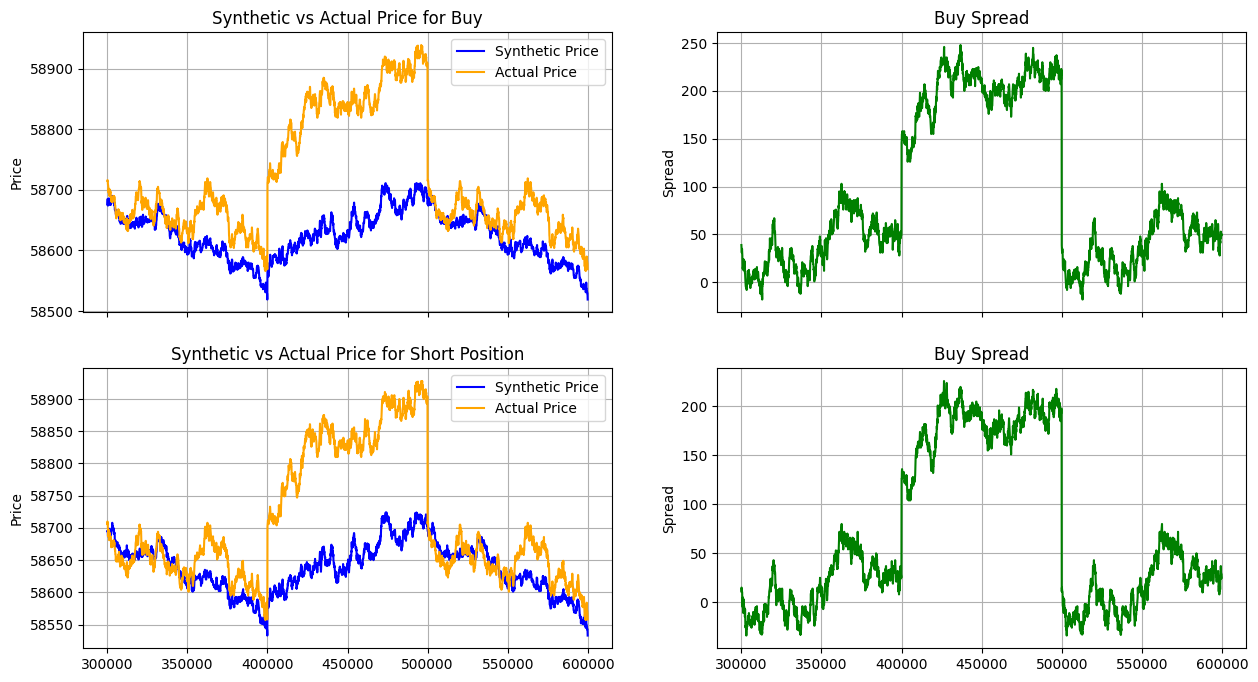

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
axs[0, 0].plot(t, synthetic_bid, label="Synthetic Price", color="blue")
axs[0, 0].plot(t, pb1["ask_price_1"], label="Actual Price", color="orange")
axs[0, 0].set_title("Synthetic vs Actual Price for Buy")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(t, buy_spread, label="Buy Spread", color="green")
axs[0, 1].grid()
axs[0, 1].set_title("Buy Spread")
axs[0, 1].set_ylabel("Spread")

axs[1, 0].plot(t, synthetic_ask, label="Synthetic Price", color="blue")
axs[1, 0].plot(t, pb1["bid_price_1"], label="Actual Price", color="orange")
axs[1, 0].set_title("Synthetic vs Actual Price for Short Position")
axs[1, 0].set_ylabel("Price")
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(t, sell_spread, label="Sell Spread", color="green")
axs[1, 1].grid()
axs[1, 1].set_title("Buy Spread")
axs[1, 1].set_ylabel("Spread")



In [5]:
z_score_buy = (buy_spread - buy_spread.mean()) / buy_spread.std()
z_score_sell = (sell_spread - sell_spread.mean()) / sell_spread.std()

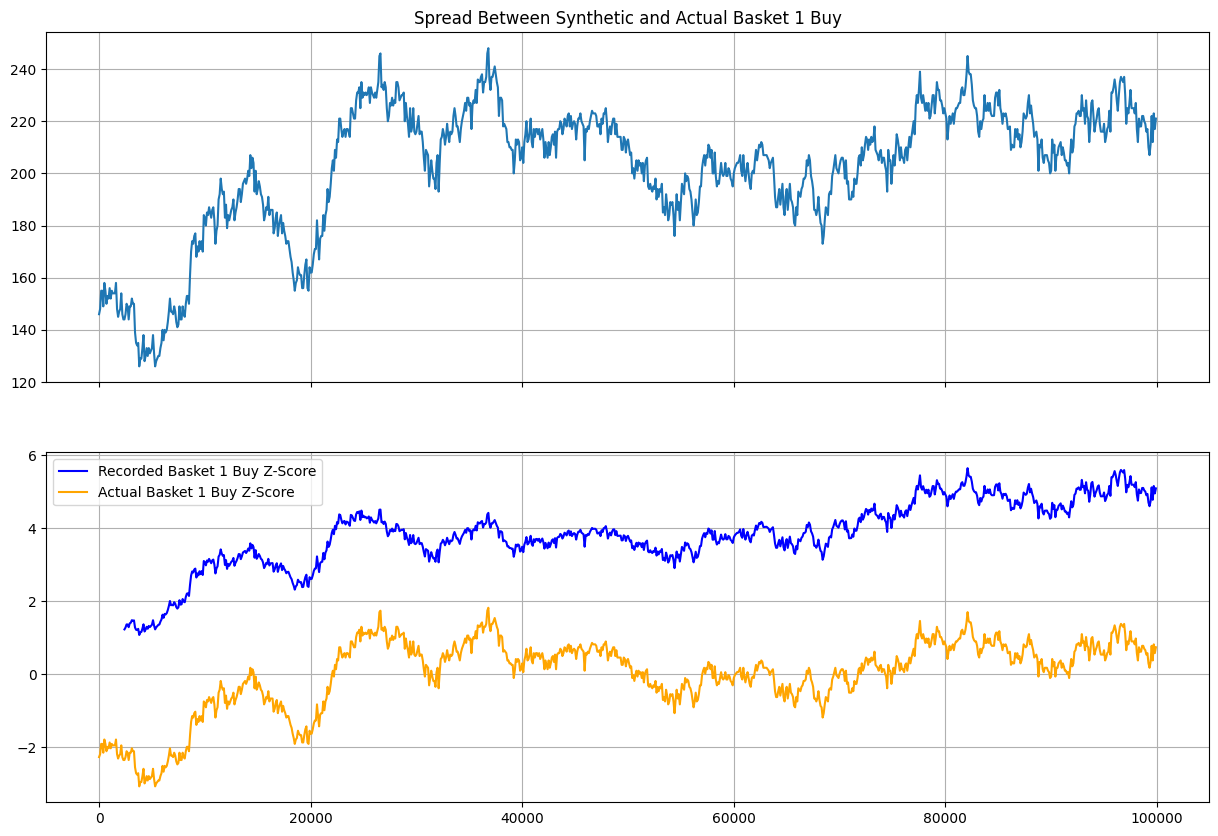

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axs[0].plot(t, sb1_buy_spread)
axs[0].set_title("Spread Between Synthetic and Actual Basket 1 Buy")
axs[0].grid()

axs[1].plot(t, sb1_zscore_buy, label="Recorded Basket 1 Buy Z-Score", color="blue")
axs[1].plot(t, z_score_buy, label="Actual Basket 1 Buy Z-Score", color="orange")
axs[1].grid()
axs[1].legend()

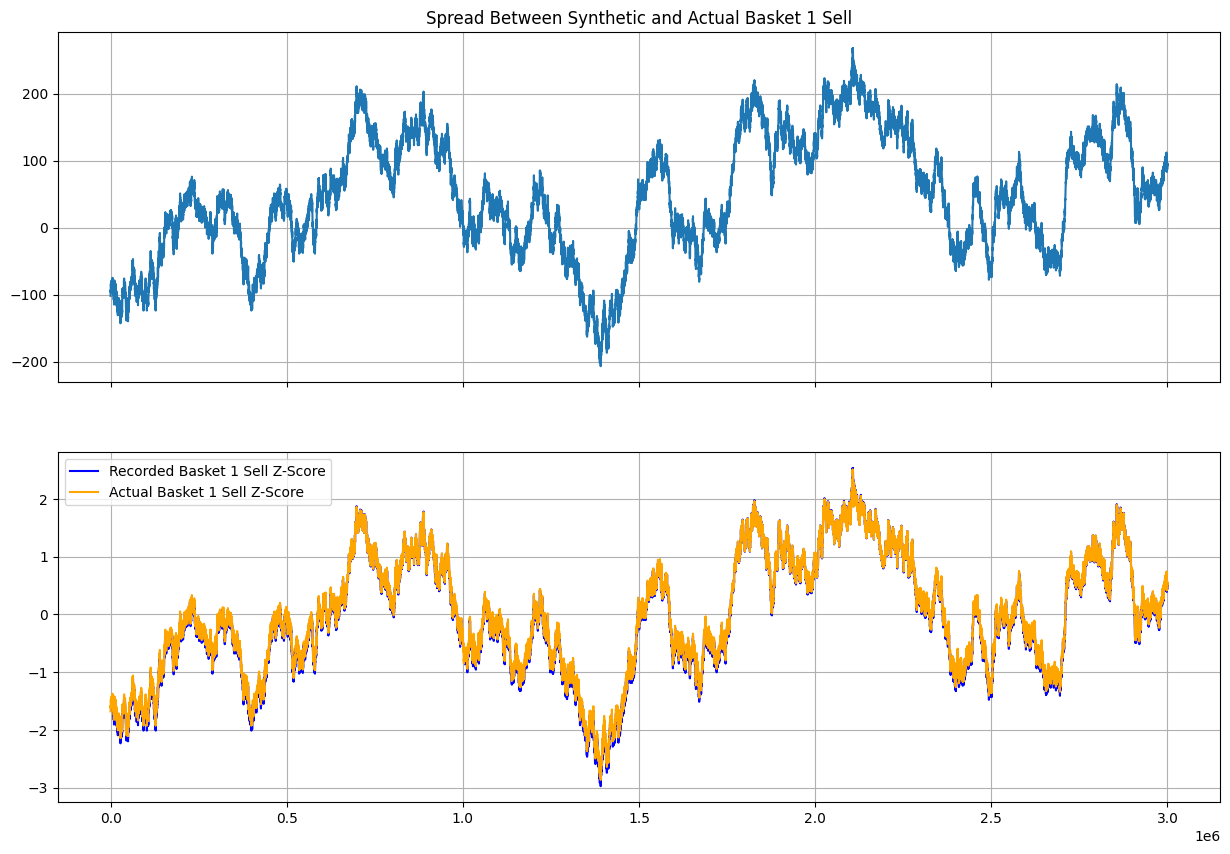

In [93]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axs[0].plot(t, sb1_sell_spread)
axs[0].set_title("Spread Between Synthetic and Actual Basket 1 Sell")
axs[0].grid()

axs[1].plot(t, sb1_zscore_sell, label="Recorded Basket 1 Sell Z-Score", color="blue")
axs[1].plot(t, z_score_sell, label="Actual Basket 1 Sell Z-Score", color="orange")
axs[1].grid()
axs[1].legend()